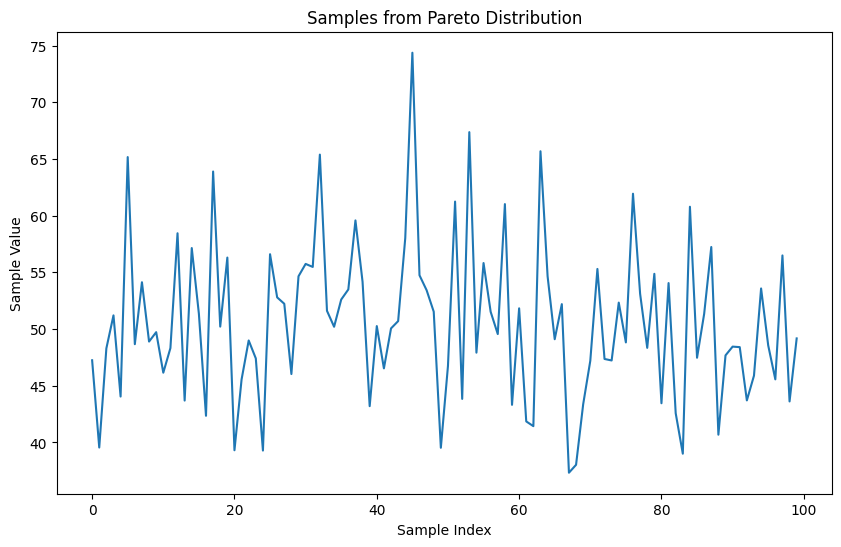

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def generate_samples(alpha, num_samples=100, num_experiments=1000):
    # Array to store the results
    results = []

    for i in range(num_experiments):
        # Generate samples from the Pareto distribution
        samples = np.random.pareto(alpha, num_samples)
        results.append(sum(samples))

    return results


def plot_results(results):
    plt.figure(figsize=(10, 6))
    # Plotting each experiment
    plt.plot(results)

    plt.title("Samples from Pareto Distribution")
    plt.xlabel("Sample Index")
    plt.ylabel("Sample Value")
    plt.show()


# Let's consider alpha=3
alpha = 3
num_samples = 100
num_experiments = 100

# Generate samples
results = generate_samples(alpha, num_samples, num_experiments)

# Plot the results
plot_results(results)

[ 57.47294255  50.15079027  90.39741604  64.77771734  88.92030921
  75.76251406  74.99072569  78.94282579  84.78158178  49.14296634
  92.57226537  49.7314635   63.59351265  89.1479738   91.2642399
  81.88392863  69.2578156   81.58249184  43.92113641  63.66875186
  61.54540795  84.01932533  66.8372713   72.6869935   84.75730481
  72.76913744  80.52223384  75.33951444  52.46248176  60.09791911
  79.86638434  76.79503978  59.20952567  79.90402526  74.88605474
  80.13947231  85.19133902  73.236427    63.18197851  95.26301805
  68.17613238  65.0118026   79.73382737  59.95310726  52.90353798
  55.53551323  90.54042692  62.87232705  65.05998486  65.25603834
  68.58780793 104.37766151  91.41222787  82.72336203  80.53321172
  82.48440833  85.86875881  72.08704735  63.69796476  86.23543178
  85.68908537  73.07320495  92.46000036  64.46155862  98.7355867
  70.82894934  82.33554549  93.06435999  69.01633745  90.64737919
  81.8358022   57.89024672  30.28384439  84.26145639  78.87844398
  77.6981727

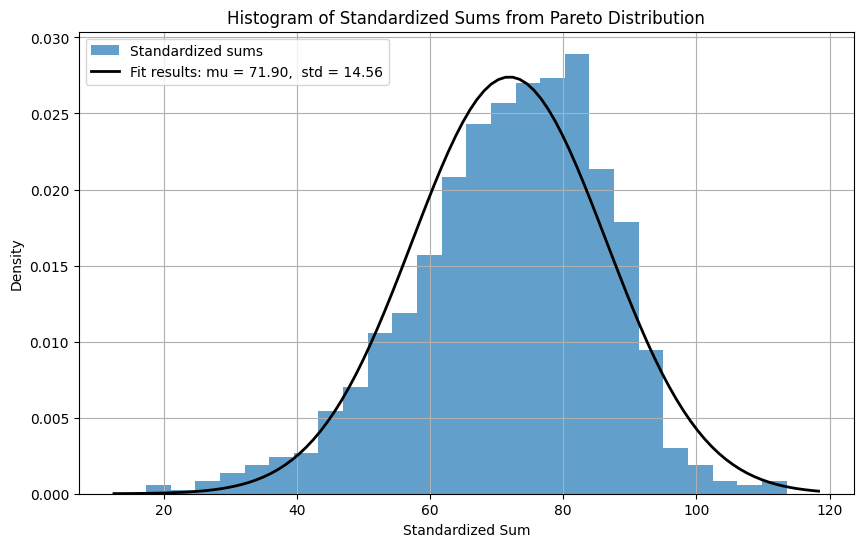

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


def generate_samples(alpha, num_samples=100, num_experiments=1000):
    # Array to store the results
    results = np.zeros(num_experiments)

    for i in range(num_experiments):
        # Generate samples from the Pareto distribution
        samples = np.random.pareto(alpha, num_samples)
        # Calculate the sum, subtract the mean, and divide by the standard deviation
        sum_samples = np.sum(samples)
        standardized_sum = (sum_samples - np.mean(samples)) / np.std(samples)
        results[i] = standardized_sum

    return results


def plot_results(results, bins="auto"):
    plt.figure(figsize=(10, 6))
    plt.hist(results, bins=bins, density=True, alpha=0.7, label="Standardized sums")

    # Fit a normal distribution to the data and plot it
    mu, std = stats.norm.fit(results)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, "k", linewidth=2, label="Fit results: mu = %.2f,  std = %.2f" % (mu, std))

    plt.title("Histogram of Standardized Sums from Pareto Distribution")
    plt.xlabel("Standardized Sum")
    plt.ylabel("Density")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# Let's consider alpha=3
alpha = 3
num_samples = 100
num_experiments = 1000

# Generate samples
results = generate_samples(alpha, num_samples, num_experiments)
print(results)

# Plot the results
plot_results(results)

In [24]:
samples = np.random.pareto(alpha, num_samples)
np.mean(samples)

0.4667904716666509

In [27]:
1 / (alpha - 1)

0.5

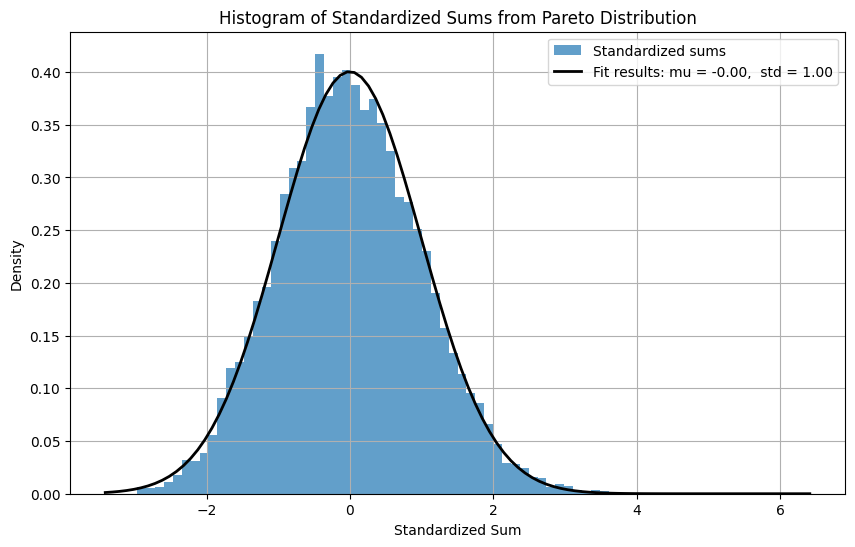

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


def generate_samples(alpha, num_samples=100, num_experiments=1000):
    # Mean and standard deviation of the Pareto distribution
    dist_mean = 1 / (alpha - 1)
    dist_std = np.sqrt(alpha / ((alpha - 1) ** 2 * (alpha - 2)))

    # Array to store the results
    results = np.zeros(num_experiments)

    for i in range(num_experiments):
        # Generate samples from the Pareto distribution
        samples = np.random.pareto(alpha, num_samples)
        # Calculate the sum, subtract the distribution mean, and divide by the distribution standard deviation
        sum_samples = np.sum(samples)
        standardized_sum = (sum_samples - dist_mean * num_samples) / (
            dist_std * np.sqrt(num_samples)
        )
        results[i] = standardized_sum

    return results


def plot_results(results, bins="auto"):
    plt.figure(figsize=(10, 6))
    plt.hist(results, bins=bins, density=True, alpha=0.7, label="Standardized sums")

    # Fit a normal distribution to the data and plot it
    mu, std = stats.norm.fit(results)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, "k", linewidth=2, label="Fit results: mu = %.2f,  std = %.2f" % (mu, std))

    plt.title("Histogram of Standardized Sums from Pareto Distribution")
    plt.xlabel("Standardized Sum")
    plt.ylabel("Density")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


# Let's consider alpha=3
alpha = 5
num_samples = 1000
num_experiments = 10000

# Generate samples
results = generate_samples(alpha, num_samples, num_experiments)

# Plot the results
plot_results(results)